# üß™ Actividad Evaluada: √Årboles de Decisi√≥n en el Dataset Titanic

üìö **Curso:** Machine Learning

## üìù Instrucciones
- Este notebook debe ser completado individualmente y subido a la plataforma del curso.
- Responde todas las celdas marcadas como c√≥digo y aseg√∫rate de que el notebook se ejecute sin errores.
- Puedes usar material del curso y documentaci√≥n oficial de Python y Scikit-learn.

## üìÑ Descripci√≥n del Dataset
El dataset **Titanic** contiene informaci√≥n sobre los pasajeros del famoso barco Titanic que naufrag√≥ en 1912. El objetivo es predecir si un pasajero sobrevivi√≥ o no (`Survived` = 1 si sobrevivi√≥, 0 si no), a partir de variables como edad, clase, sexo, y punto de embarque.

Este conjunto de datos es ampliamente utilizado en aprendizaje autom√°tico como un primer ejemplo de clasificaci√≥n supervisada.

---

# üåä Actividad Evaluada: √Årboles de Decisi√≥n con el Dataset Titanic

En esta actividad aplicar√°s un modelo de √°rboles de decisi√≥n sobre el dataset Titanic.

### üéØ Objetivos:
- Cargar y explorar el dataset
- Preprocesar las variables categ√≥ricas con One Hot Encoding
- Entrenar un √°rbol de decisi√≥n
- Visualizar el √°rbol
- Evaluar el desempe√±o del modelo

üïê Tiempo estimado: 60 a 90 minutos

In [ ]:
# üì• Cargar el dataset desde la URL de Kaggle (alternativamente cargar localmente)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

## üîç 1. Exploraci√≥n inicial del dataset

Antes de comenzar a entrenar modelos de Machine Learning, es fundamental **comprender la estructura y el contenido del conjunto de datos**. En esta secci√≥n, deber√°s realizar una exploraci√≥n b√°sica del dataset Titanic para identificar:

- Las columnas disponibles y sus tipos de datos (`.info()`)
- Las estad√≠sticas descriptivas de las variables num√©ricas (`.describe()`)
- La existencia de valores faltantes (`.isnull().sum()`)

Estas acciones te permitir√°n decidir qu√© pasos de limpieza y preprocesamiento son necesarios. **Recuerda comentar brevemente tus observaciones** al final de esta secci√≥n, por ejemplo: si hay columnas con muchos datos faltantes, si hay outliers o si ciertas variables parecen poco informativas.

In [7]:
# Importar las librer√≠as
import pandas as pd

# Cargar el dataset de Titanic desde la URL otorgada para la tarea
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar informaci√≥n general del dataset y variables n√∫mericas
print("\nInformaci√≥n del dataset:")
print(df.info())
print("\nEstad√≠sticas descriptivas:")
print(df.describe())

# Mostrar la cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())



Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

## üßπ 2. Preprocesamiento

Antes de entrenar un modelo de Machine Learning, es necesario **preparar adecuadamente los datos**. Este proceso se conoce como *preprocesamiento* y consiste en dejar el conjunto de datos en un formato que los algoritmos puedan utilizar de manera efectiva.

### Pasos a seguir:

1. **Eliminar columnas innecesarias**: Algunas columnas como `PassengerId`, `Name`, `Ticket` o `Cabin` no aportan informaci√≥n √∫til al modelo o contienen datos dif√≠ciles de procesar autom√°ticamente (como texto libre o demasiados valores √∫nicos).

2. **Manejo de valores faltantes**:
   - La columna `Age` tiene valores faltantes que puedes reemplazar por la **mediana**, ya que es menos sensible a valores extremos.
   - La columna `Embarked` tiene pocos valores faltantes, as√≠ que puedes usar la **moda** (valor m√°s frecuente) para completarlos.

3. **Codificaci√≥n de variables categ√≥ricas**:
   - Los algoritmos no pueden trabajar directamente con texto. Por eso, aplicamos **One Hot Encoding** a las variables categ√≥ricas como `Sex` y `Embarked`, transform√°ndolas en columnas binarias (0 y 1).
   - Usar `drop_first=True` evita multicolinealidad y reduce la cantidad de columnas.

> ‚ö†Ô∏è **Importante:** El preprocesamiento tiene un gran impacto en la calidad del modelo. Un paso mal hecho puede afectar seriamente el desempe√±o del algoritmo.

Al finalizar esta etapa, deber√≠as tener un dataset **limpio, sin valores nulos y completamente num√©rico**.

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Quitar columnas no √∫tiles
df_proc = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# 2. Rellenar valores faltantes:
imp_age = SimpleImputer(strategy='median')
df_proc['Age'] = imp_age.fit_transform(df_proc[['Age']])[:, 0]

imp_emb = SimpleImputer(strategy='most_frequent')
df_proc['Embarked'] = imp_emb.fit_transform(df_proc[['Embarked']])[:, 0]

# 3. Codificar las variables Sex y Embarked con "One Hot Encoding"
ohe = OneHotEncoder(drop='first', sparse_output=False)
cat_cols = ['Sex', 'Embarked']
ohe_arr = ohe.fit_transform(df_proc[cat_cols])
ohe_df = pd.DataFrame(
    ohe_arr,
    columns=ohe.get_feature_names_out(cat_cols),
    index=df_proc.index
)

# 4. Combinar dummies con las columnas num√©ricas
df_final = pd.concat([df_proc.drop(columns=cat_cols), ohe_df], axis=1)

# 5. Comprobar que no haya nulos y listar columnas finales para usarlas en el √°rbol
print("Nulos tras preprocesamiento:\n", df_final.isnull().sum())
print("\nColumnas finales:", df_final.columns.tolist())


Nulos tras preprocesamiento:
 Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Columnas finales: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


## üß† 3. Entrenamiento del modelo de √Årbol de Decisi√≥n

En esta etapa, construiremos un modelo predictivo utilizando un **√Årbol de Decisi√≥n**, una t√©cnica de clasificaci√≥n que divide los datos en ramas sucesivas para tomar decisiones basadas en las caracter√≠sticas del conjunto de datos.

### Pasos a seguir:

1. **Separar las variables predictoras (X) y la variable objetivo (y)**.  
   En este caso, `Survived` ser√° nuestra variable objetivo, y el resto de las columnas las usaremos como predictores.

2. **Dividir los datos en conjuntos de entrenamiento y prueba**.  
   Esto se hace para evaluar el modelo con datos que no ha visto antes. Usa `train_test_split` para crear una divisi√≥n, por ejemplo 70% entrenamiento y 30% prueba.

3. **Crear y entrenar el modelo con `DecisionTreeClassifier`**.  
   Puedes usar el par√°metro `max_depth` para limitar la profundidad del √°rbol y evitar sobreajuste.

Cuando termines esta secci√≥n, tu modelo estar√° entrenado y listo para ser evaluado y visualizado.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Separar las caracter√≠sticas de la etiqueta (X de Y)
X = df_final.drop(columns=['Survived'])
y = df_final['Survived']

# Dividir en entrenamiento (70%) y prueba (30%) con estratificaci√≥n
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# Crear el √°rbol de decisi√≥n (Lo he creado para que tenga una profundidad m√°xima de 4)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Mostrar la profundidad y el n√∫mero de nodos del √°rbol entrenado
print(f"√Årbol entrenado. Profundidad real: {clf.get_depth()}  |  N¬∫ de nodos: {clf.tree_.node_count}")



√Årbol entrenado. Profundidad real: 4  |  N¬∫ de nodos: 27


## üå≥ 4. Visualizaci√≥n del √°rbol

Una de las grandes ventajas de los √°rboles de decisi√≥n es que su estructura se puede visualizar de forma intuitiva, lo que facilita la **interpretaci√≥n del modelo**.

En esta secci√≥n usaremos la funci√≥n `plot_tree()` de `sklearn` para graficar el √°rbol entrenado. En el gr√°fico:

- Cada **nodo interno** representa una condici√≥n de decisi√≥n sobre alguna variable.
- Cada **rama** muestra el resultado de esa decisi√≥n (verdadero o falso).
- Cada **nodo terminal** (o hoja) muestra la clase predicha y cu√°ntas muestras llegaron a ese punto.

### Sugerencia:
Puedes ajustar los par√°metros de `plot_tree()` como `feature_names`, `class_names` y `filled=True` para mejorar la legibilidad del √°rbol. Aseg√∫rate de usar `plt.figure(figsize=(ancho, alto))` para que la visualizaci√≥n no se corte.

**Objetivo:** Entender c√≥mo el modelo est√° tomando decisiones, qu√© variables usa y con qu√© prioridad.

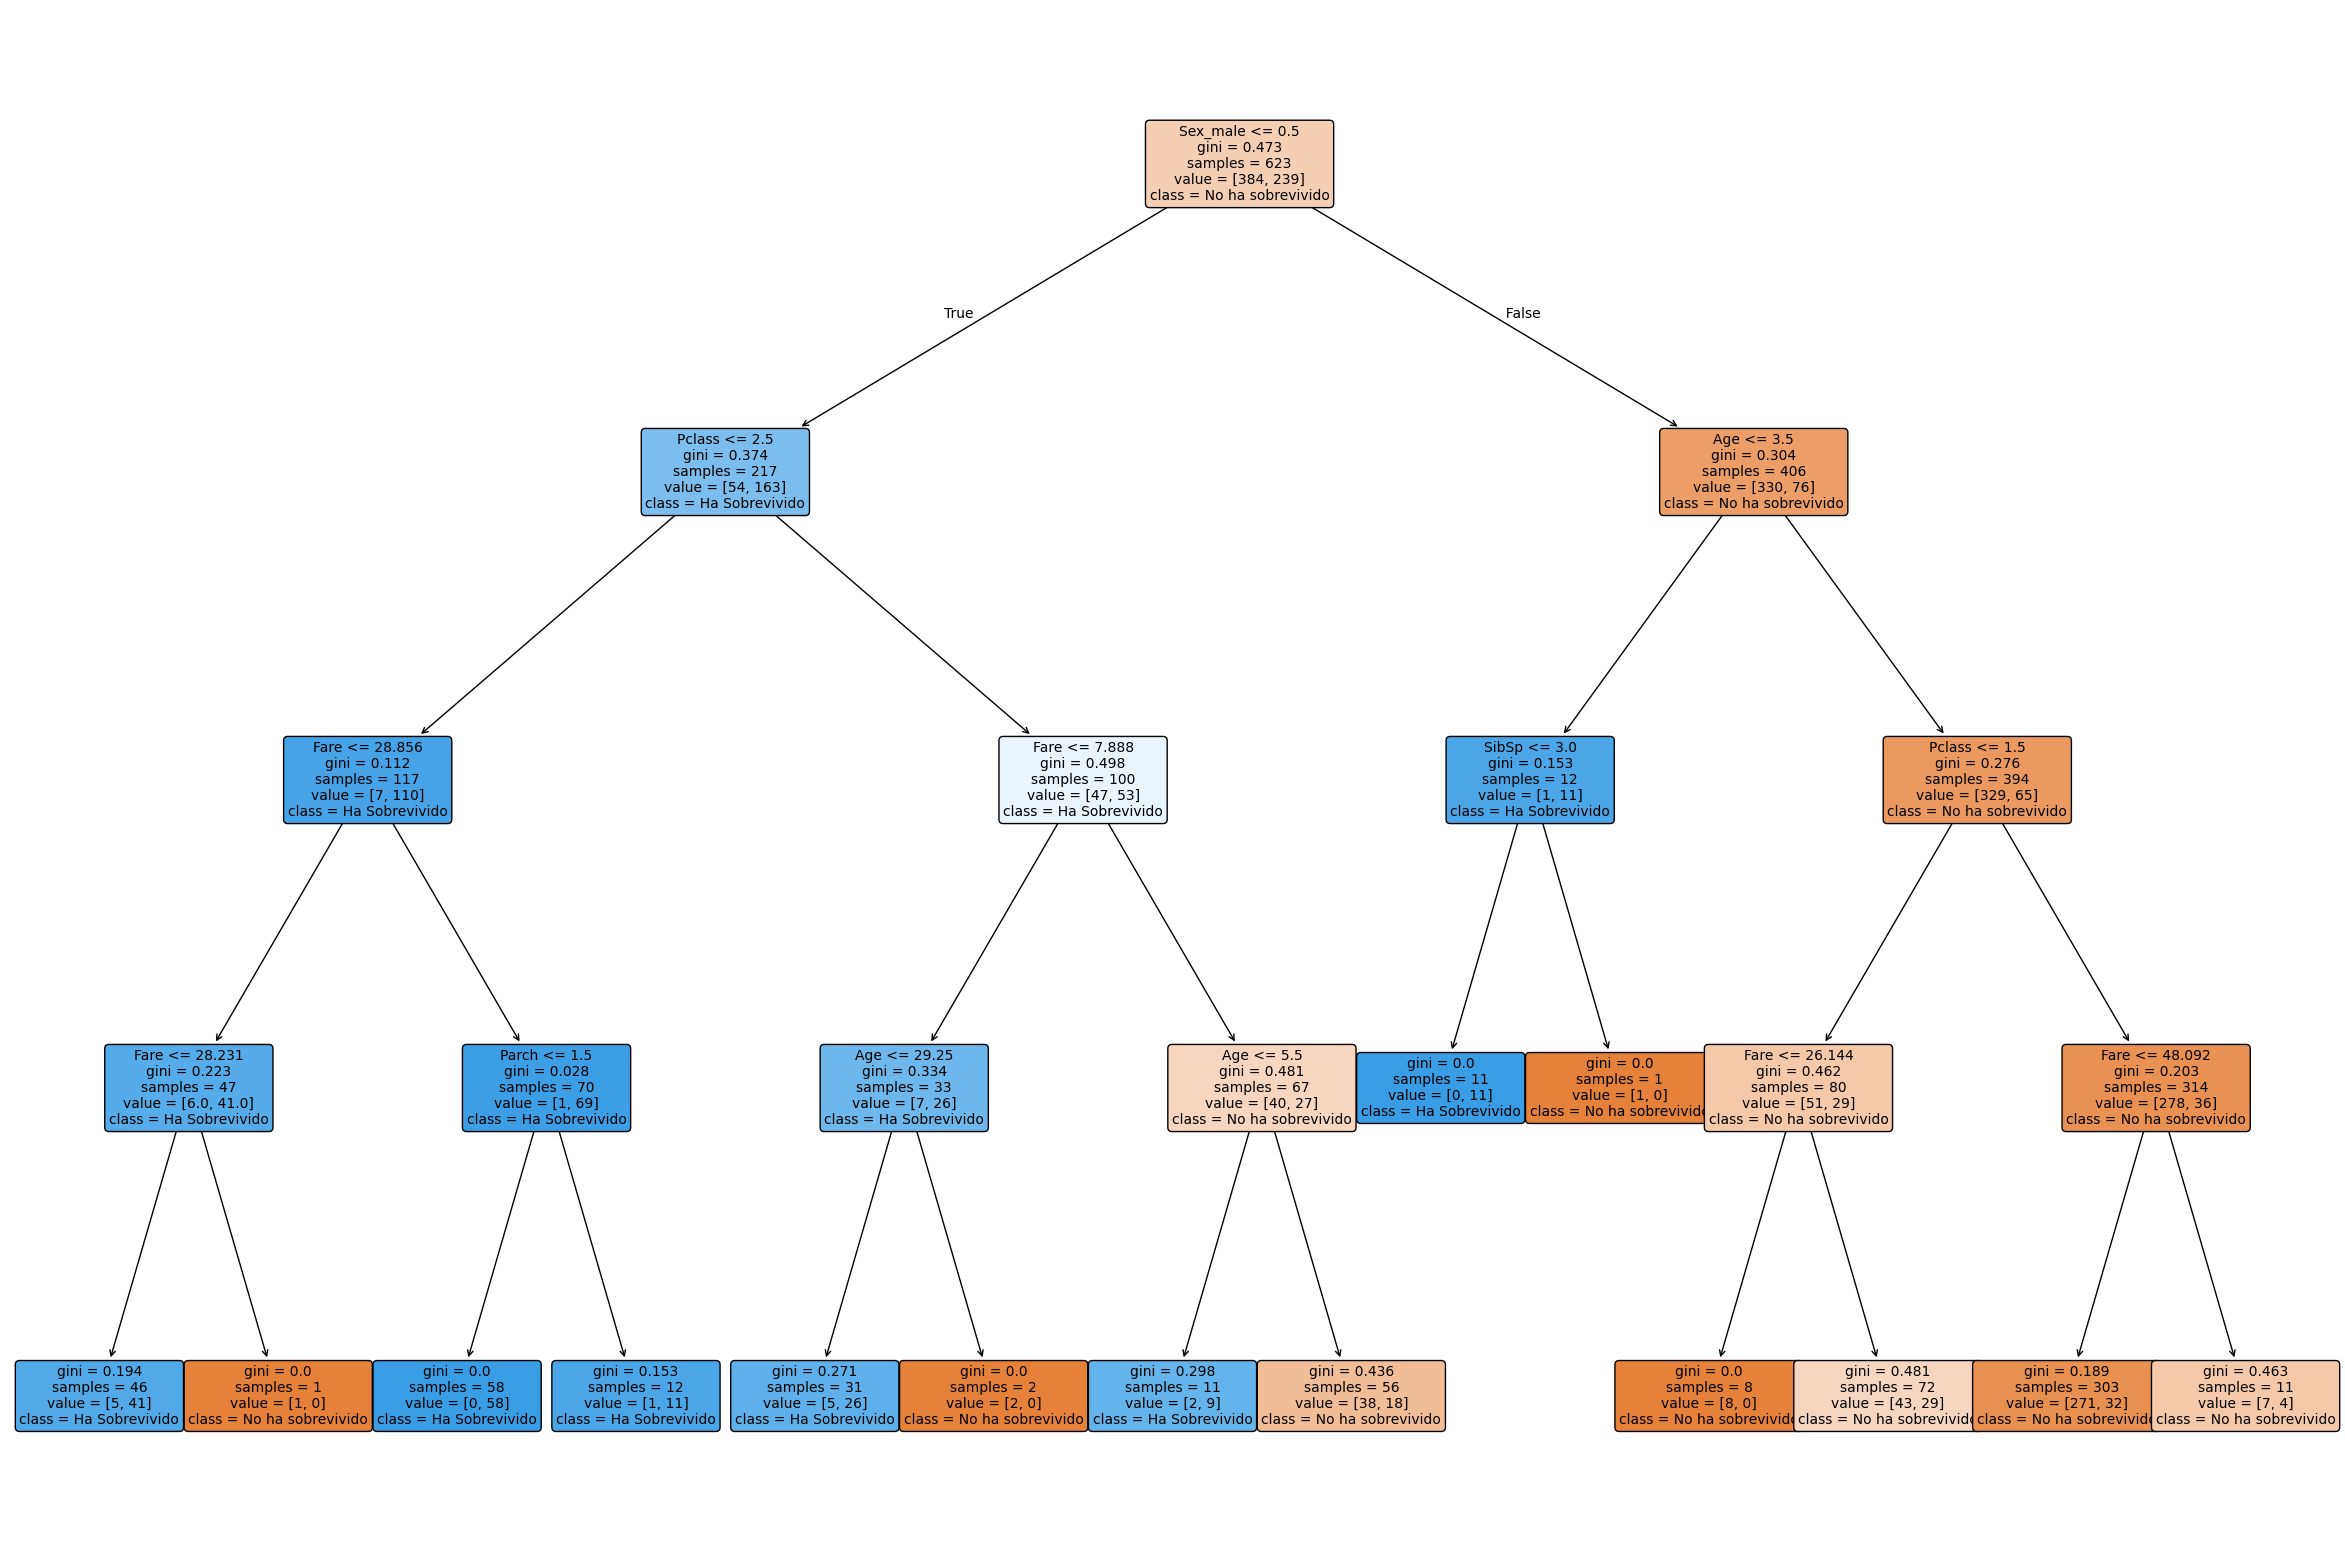

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

# De ser necesario, se pueden manipular estas entradas para cambiar el tama√±o del √°rbol de decisi√≥n
plt.figure(figsize=(30, 20))

tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No ha sobrevivido', 'Ha Sobrevivido'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()



## üìà 5. Evaluaci√≥n del modelo

Una vez entrenado el modelo, es fundamental **evaluar su desempe√±o** para entender qu√© tan bien est√° funcionando. En esta secci√≥n usaremos datos de prueba (no vistos por el modelo durante el entrenamiento) para calcular m√©tricas que nos ayuden a juzgar la calidad de las predicciones.

### M√©tricas que utilizaremos:

- **Matriz de confusi√≥n (`confusion_matrix`)**: muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Es √∫til para entender errores espec√≠ficos del modelo.
- **Reporte de clasificaci√≥n (`classification_report`)**: incluye precisi√≥n (*precision*), exhaustividad (*recall*), y la m√©trica F1 para cada clase.
- **Exactitud (`accuracy_score`)**: indica qu√© porcentaje total de predicciones fue correcto.

Estas m√©tricas te permitir√°n **identificar si el modelo est√° desbalanceado**, si tiende a predecir m√°s una clase que otra, y si necesita ajustes en par√°metros o preprocesamiento.

> üí° Recuerda: un modelo con buena precisi√≥n pero bajo *recall* puede ser problem√°tico si nos interesa no dejar pasar casos positivos (como sobrevivientes).

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Mostrar la matriz de confusi√≥n
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusi√≥n:")
print(cm)

# Mostrar m√©tricas de precisi√≥n, recall y F1 para cada clase
print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred, target_names=['No ha sobrevivido', 'Ha Sobrevivido']))

# C√°lculo de accurancy
acc = accuracy_score(y_test, y_pred)
print(f"\nExactitud (accuracy): {acc:.4f}")


Matriz de confusi√≥n:
[[156   9]
 [ 45  58]]

Reporte de clasificaci√≥n:
                   precision    recall  f1-score   support

No ha sobrevivido       0.78      0.95      0.85       165
   Ha Sobrevivido       0.87      0.56      0.68       103

         accuracy                           0.80       268
        macro avg       0.82      0.75      0.77       268
     weighted avg       0.81      0.80      0.79       268


Exactitud (accuracy): 0.7985


---
## ü§î Preguntas de Reflexi√≥n

Responde brevemente las siguientes preguntas al final de tu actividad. Puedes escribir tus respuestas directamente bajo cada pregunta:

1. ¬øQu√© variables crees que fueron m√°s importantes para predecir la supervivencia? ¬øPor qu√©?

2. ¬øQu√© limitaciones puede tener un √°rbol de decisi√≥n si no se controla su profundidad?

3. ¬øQu√© diferencias habr√≠a si us√°ramos codificaci√≥n ordinal en lugar de One Hot Encoding?

4. ¬øQu√© cambiar√≠as en el preprocesamiento o configuraci√≥n del modelo para mejorar los resultados?

5. ¬øCrees que este modelo se puede usar directamente en un entorno real? ¬øQu√© consideraciones √©ticas o t√©cnicas deber√≠as tener?


**1. ¬øQu√© variables crees que fueron m√°s importantes para predecir la supervivencia? ¬øPor qu√©?**

In [ ]:
# El modelo considera Sex_male como la variable m√°s importante debido a la regla de ‚Äúmujeres y ni√±os primero‚Äù; a continuaci√≥n la variable Pclass refleja la posici√≥n socioecon√≥mica y el acceso a los botes salvavidas;
# Age captura las prioridades de embarque seg√∫n la edad (ni√±os y mayores primero); y Fare, aunque correlacionada con la clase, aporta un matiz extra sobre la ubicaci√≥n exacta en el barco y el nivel socioecon√≥mico
# dentro de cada clase.


**2. ¬øQu√© limitaciones puede tener un √°rbol de decisi√≥n si no se controla su profundidad?**

In [ ]:
# Un √°rbol sin restricci√≥n de profundidad puede sobreajustar al captar el ruido del conjunto de entrenamiento, mostrar una alta varianza ante ligeros cambios en los datos y
# volverse menos interpretable por el exceso de ramas y nodos.



**3. ¬øQu√© diferencias habr√≠a si us√°ramos codificaci√≥n ordinal en lugar de One Hot Encoding?**

In [ ]:
# Con codificaci√≥n ordinal se asignan valores secuenciales que sugieren jerarqu√≠as inexistentes (p.ej. C=0, Q=1, S=2), generan distancias num√©ricas enga√±osas entre categor√≠as y,
# aunque reducen el n√∫mero de columnas, introducen relaciones artificiales que pueden sesgar el modelo.




**4. ¬øQu√© cambiar√≠as en el preprocesamiento o configuraci√≥n del modelo para mejorar los resultados?**

In [ ]:
# Aplicar√≠a ingenier√≠a de caracter√≠sticas (p.ej. FamilySize = SibSp + Parch + 1, flag IsAlone), usar√≠a imputaci√≥n avanzada para Age (regresi√≥n o KNN en lugar de la mediana),
# ajustar√≠a hiperpar√°metros (max_depth, min_samples_split, min_samples_leaf con GridSearchCV), e incorporar√≠a poda post-entrenamiento para controlar el sobreajuste y, en caso de desbalance de clases,
# emplear√≠a class_weight='balanced' o t√©cnicas de sobremuestreo/submuestreo.



**5. ¬øCrees que este modelo se puede usar directamente en un entorno real? ¬øQu√© consideraciones √©ticas o t√©cnicas deber√≠as tener?**

In [ ]:
# No es apto para producci√≥n sin ajustes: √©ticamente reproduce sesgos hist√≥ricos (sexo, clase, edad) y puede perpetuar desigualdades; t√©cnicamente requiere reentrenar con datos actuales para evitar data drift (para
# contextualizar el data dritf es el fen√≥meno por el cual la distribuci√≥n de las variables de entrada cambia con el tiempo respecto),
# establecer pipelines de monitoreo y mantenimiento continuo, y garantizar cumplimiento de privacidad y normativas (p. ej. GDPR).

